In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tabulate import tabulate as tab
import warnings

import generate_synthetic_data as gsd


## Read Data

In [2]:
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# data, labels = gsd.read_data_txt(IDs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
data, labels = gsd.read_data_txt(IDs = [1])

case    total    gammas    neutrons    ratio (g/n)
------  -------  --------  ----------  -------------
case1   623142   511540    111602      4.6
---     ---      ---       ---         ---
Total   623142   511540    111602      4.6


### Merge all cases together

In [3]:
data_merged, labels_merged, neutrons_merged, gammas_merged = gsd.merge_cases_together(data, labels)

## Get The Templates

We sorted and binned them by amplitude in ten bins (bin width 0.045 V), ranging from 0.05 to 0.5 V. 

Pulses in each energy bin were averaged to obtain a pulse template. 

Through this method, we generated ten pulse templates with discrete amplitudes from 0.05 V to 0.5 V for both neutron and gamma-ray pulse types.

In [4]:
bin_edges = np.linspace(0.05, 0.5, 11) # 11 edges → 10 bins
# bin_edges = np.linspace(0.05, 0.5, 6) # 6 edges → 5 bins

In [5]:
print('neutrons')
bin_centers_n, templates_n, _ = gsd.make_templates(neutrons_merged, bin_edges)
print('\ngammas')
bin_centers_g, templates_g, _ = gsd.make_templates(gammas_merged, bin_edges)

neutrons
 sample shape (111602, 296)
 peak amplitude (min, max) -0.0031 0.7248
 average peak amplitude 0.0011733164806936982
 counts per bin: [7105 2698 1088  644  375  144   89   44    9    2]

gammas
 sample shape (511540, 296)
 peak amplitude (min, max) -0.0035 1.6763
 average peak amplitude 0.001371740557658971
 counts per bin: [141622   5247   3539   2292   1548   1259   1005    692    663    590]


In [6]:
print('Selection')
data_clean, labels_clean = gsd.pulse_selection_tight(data_merged, labels_merged)
neutrons_clean = data_clean[labels_clean == 1]
gammas_clean = data_clean[labels_clean == 0]
print('\nneutrons clean')
bin_centers_n_clean, templates_n_clean, templates_n_clean_norm = gsd.make_templates(neutrons_clean, bin_edges)
print('gammas clean')
bin_centers_g_clean, templates_g_clean, templates_g_clean_norm = gsd.make_templates(gammas_clean, bin_edges)

Selection
                    count    percentage of total [%]
------------------  -------  -------------------------
Ntot                623142
count_minThreshold  448931   72.0
count_maxThreshold  0        0.0
count_switch        0        0.0
count_beforePulses  1316     0.2
count_afterPulses   1458     0.2
---                 ---      ---
Nsel                171435   27.5

neutrons clean
 sample shape (10594, 296)
 peak amplitude (min, max) -0.0021 0.7248
 average peak amplitude 0.005327614432442639
 counts per bin: [5617 2617 1065  636  373  142   89   44    7    1]
gammas clean
 sample shape (160841, 296)
 peak amplitude (min, max) -0.0025 1.6763
 average peak amplitude 0.0029209297347035836
 counts per bin: [141539   5239   3536   2291   1547   1256   1005    692    662    590]


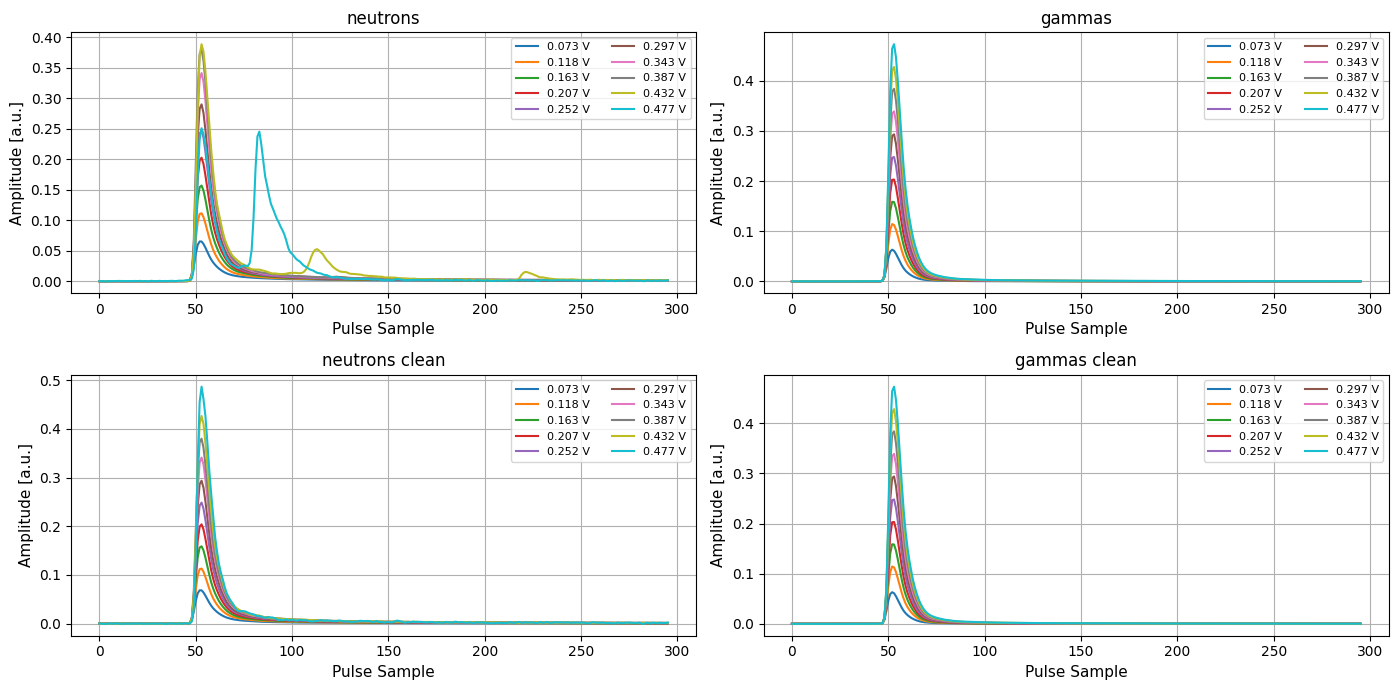

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

axs = axs.flatten()
for i in range(10):
    axs[0].plot(templates_n[i], label=f"{bin_centers_n[i]:.3f} V")
    axs[1].plot(templates_g[i], label=f"{bin_centers_g[i]:.3f} V")
    axs[2].plot(templates_n_clean[i], label=f"{bin_centers_n_clean[i]:.3f} V")
    axs[3].plot(templates_g_clean[i], label=f"{bin_centers_g_clean[i]:.3f} V")

for i in range(0, 4):
    axs[i].set_xlabel("Pulse Sample", fontsize=11)
    axs[i].set_ylabel("Amplitude [a.u.]", fontsize=11)
    axs[i].legend(ncol=2, fontsize=8)
    axs[i].grid()
    # axs[i].set_xlim(0, 120)
    # axs[i].set_ylim(0, 1.05)
axs[0].set_title(f'neutrons')
axs[1].set_title(f'gammas')
axs[2].set_title(f'neutrons clean')
axs[3].set_title(f'gammas clean')
plt.tight_layout()
plt.show()




## Align Templates

In [8]:
templates_n_clean_norm = gsd.align_templates(templates_n_clean_norm, target_idx=60)
templates_g_clean_norm = gsd.align_templates(templates_g_clean_norm, target_idx=60)

templates_n_clean = gsd.align_templates(templates_n_clean, target_idx=60)
templates_g_clean = gsd.align_templates(templates_g_clean, target_idx=60)

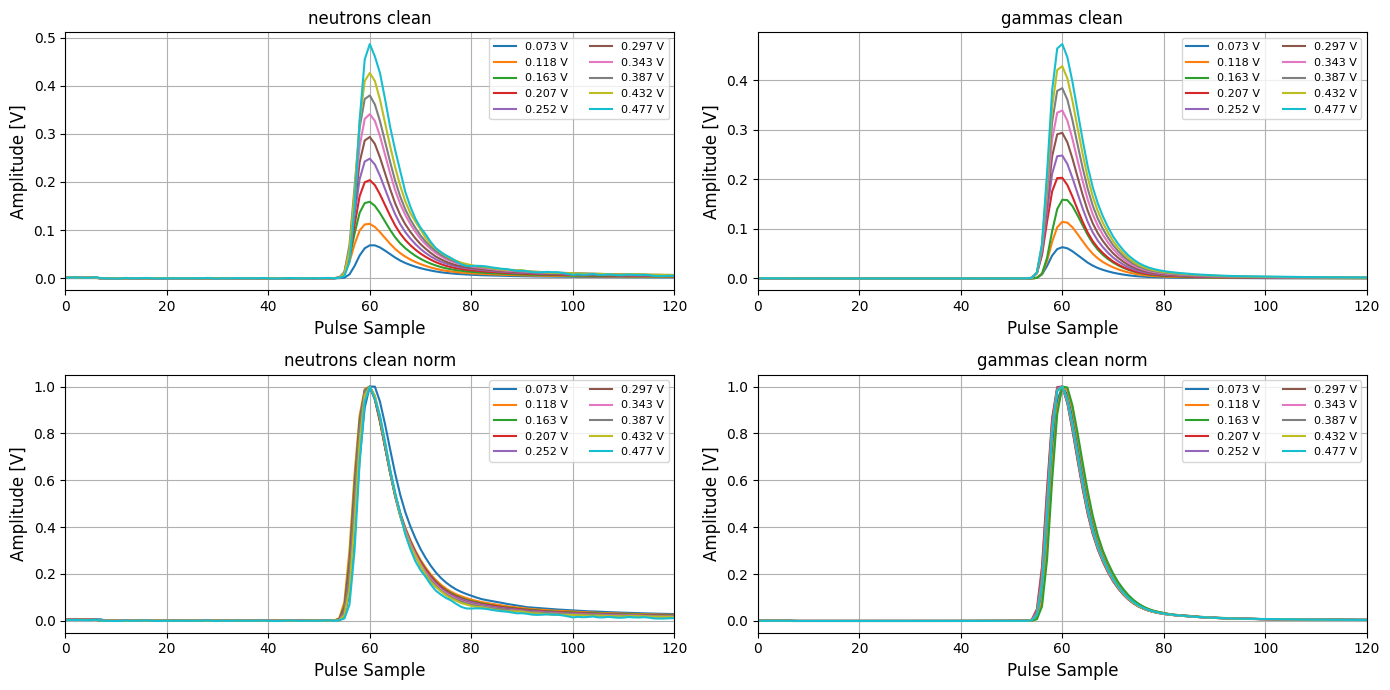

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

axs = axs.flatten()
axs[0].set_title(f'neutrons clean')
axs[1].set_title(f'gammas clean')
axs[2].set_title(f'neutrons clean norm')
axs[3].set_title(f'gammas clean norm')
for i in range(10):
    axs[0].plot(templates_n_clean[i], label=f"{bin_centers_n[i]:.3f} V")
    axs[1].plot(templates_g_clean[i], label=f"{bin_centers_g[i]:.3f} V")
    axs[2].plot(templates_n_clean_norm[i], label=f"{bin_centers_n[i]:.3f} V")
    axs[3].plot(templates_g_clean_norm[i], label=f"{bin_centers_g[i]:.3f} V")

for i in range(0, 4):
    axs[i].set_xlabel("Pulse Sample", fontsize=12)
    axs[i].set_ylabel("Amplitude [V]", fontsize=12)
    axs[i].legend(ncol=2, fontsize=8)
    axs[i].grid()
    axs[i].set_xlim(0, 120)
    # axs[i].set_ylim(0, 0.5)
plt.tight_layout()
plt.show()

# Interpolation

In [10]:
templates_neutrons_norm = templates_n_clean_norm
templates_gammas_norm = templates_g_clean_norm
print('n', templates_neutrons_norm.shape)
print('g', templates_gammas_norm.shape)
bin_centers = bin_centers_n_clean

n (10, 296)
g (10, 296)


### check

/Users/emiliebertholet/Desktop/DataAnalysis/GMVAEpaper/synthetic_data/generate_synthetic_data.py:261: UserWarning: A=0.020 below template range [0.073, 0.477] — clamping to lowest template
  warnings.warn(


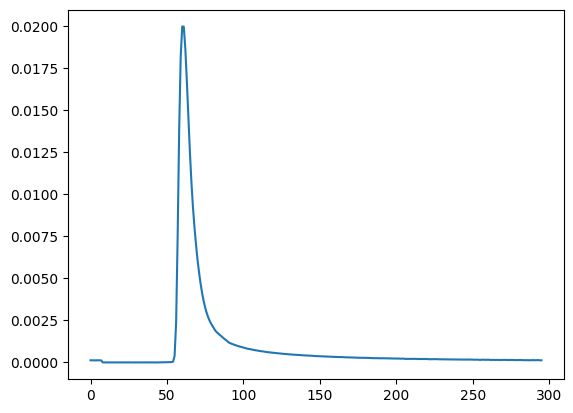

In [11]:
p = gsd.generate_synthetic_pulse(0.02, templates_neutrons_norm, bin_centers, 0.0, Normalize=False)

plt.plot(p)
plt.show()

/Users/emiliebertholet/Desktop/DataAnalysis/GMVAEpaper/synthetic_data/generate_synthetic_data.py:261: UserWarning: A=0.010 below template range [0.073, 0.477] — clamping to lowest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/GMVAEpaper/synthetic_data/generate_synthetic_data.py:261: UserWarning: A=0.050 below template range [0.073, 0.477] — clamping to lowest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/GMVAEpaper/synthetic_data/generate_synthetic_data.py:268: UserWarning: A=0.500 above template range [0.073, 0.477] — clamping to highest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/GMVAEpaper/synthetic_data/generate_synthetic_data.py:268: UserWarning: A=0.700 above template range [0.073, 0.477] — clamping to highest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/GMVAEpaper/synthetic_data/generate_synthetic_data.py:268: UserWarning: A=1.000 above template range [0.073, 0.477] — clamping to h

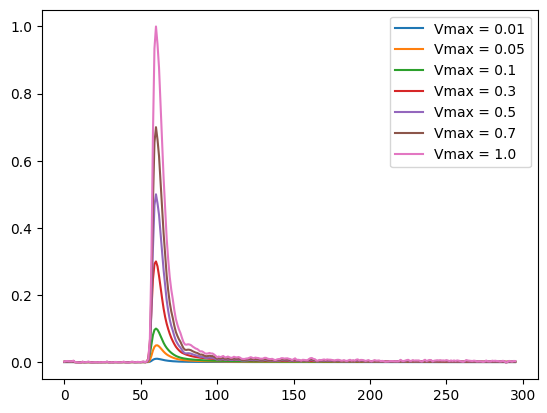

In [13]:
for A in [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0]:
    p = gsd.generate_synthetic_pulse(A, templates_neutrons_norm, bin_centers, 0.0, Normalize=False)
    plt.plot(p, label=f'Vmax = {A}')
plt.legend()
plt.show()

### generate small sample

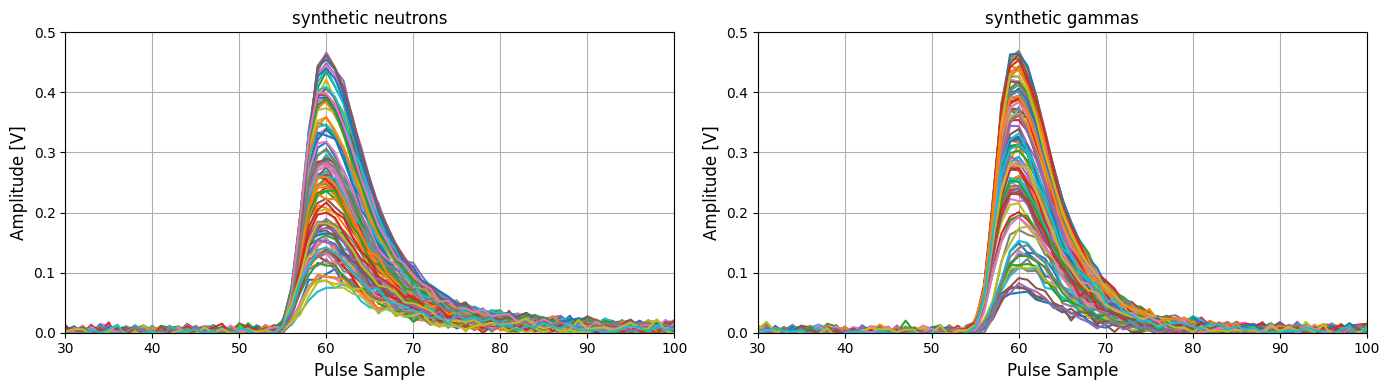

In [15]:
noise_sigma = 0.005
Npulses = 100

neutrons_synth, _ = gsd.generate_sample(templates = templates_neutrons_norm, 
                                 bin_centers =  bin_centers, 
                                 Npulses = Npulses, 
                                 sigma = noise_sigma,
                                 Normalize=False
                                 )

gammas_synth, _ = gsd.generate_sample(templates = templates_gammas_norm, 
                                 bin_centers =  bin_centers, 
                                 Npulses = Npulses, 
                                 sigma = noise_sigma,
                                 Normalize=False
                                 )

if Npulses <=100:
    fig, axs = plt.subplots(1, 2, figsize=(14, 4))
    for n in neutrons_synth:
        axs[0].plot(n)
        axs[0].set_title('synthetic neutrons')

    for g in gammas_synth:
        axs[1].plot(g)
        axs[1].set_title('synthetic gammas')

    for i in range(0, 2):
        axs[i].set_xlabel("Pulse Sample", fontsize=12)
        axs[i].set_ylabel("Amplitude [V]", fontsize=12)
        # axs[i].legend(ncol=2, fontsize=8)
        axs[i].grid()
        axs[i].set_xlim(30, 100)
        axs[i].set_ylim(0, 0.5)
    plt.tight_layout()
    plt.show()

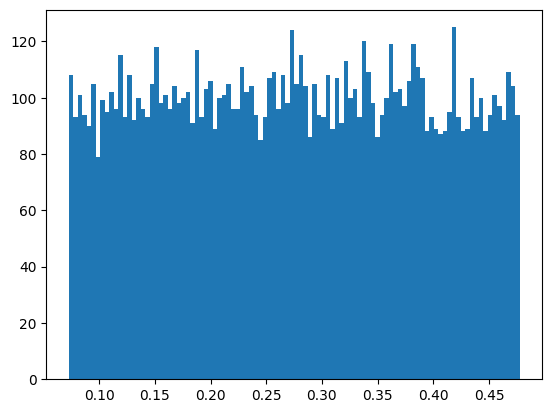

In [16]:
Npulses = 10000
neutrons_synth, amps = gsd.generate_sample(templates = templates_neutrons_norm, 
                                 bin_centers =  bin_centers, 
                                 Npulses = Npulses, 
                                 sigma = noise_sigma,
                                 Normalize=False
                                 )
plt.hist(amps, bins=100);

## PSD on synthetic data

Improve / check

- what happens of the end (start) point is after (before) the trigger window

In [21]:
# sigma_noise = 0.001
# sigma_noise = 0.0025
sigma_noise = 0.005
# sigma_noise = 0.01

min_voltage = 0
max_voltage = 2.

Npulses = 100000 # 100000 is ok, 500000 takes 10s
neutrons_synth, _ = gsd.generate_sample(templates = templates_neutrons_norm, 
                                 bin_centers =  bin_centers, 
                                 Npulses = Npulses, 
                                 sigma = sigma_noise,
                                 A_min=min_voltage, 
                                 A_max=max_voltage,
                                 Normalize=False) # if True PSD doesn't work

gammas_synth, _ = gsd.generate_sample(templates = templates_gammas_norm, 
                                 bin_centers =  bin_centers, 
                                 Npulses = Npulses, 
                                 sigma = sigma_noise,
                                 A_min=min_voltage, 
                                 A_max=max_voltage,
                                 Normalize=False) # if True PSD doesn't work
data_synth = np.concatenate((neutrons_synth, gammas_synth), axis=0)
data_synth.shape

/Users/emiliebertholet/Desktop/DataAnalysis/GMVAEpaper/synthetic_data/generate_synthetic_data.py:268: UserWarning: A=0.642 above template range [0.073, 0.477] — clamping to highest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/GMVAEpaper/synthetic_data/generate_synthetic_data.py:268: UserWarning: A=1.897 above template range [0.073, 0.477] — clamping to highest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/GMVAEpaper/synthetic_data/generate_synthetic_data.py:268: UserWarning: A=0.527 above template range [0.073, 0.477] — clamping to highest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/GMVAEpaper/synthetic_data/generate_synthetic_data.py:268: UserWarning: A=0.969 above template range [0.073, 0.477] — clamping to highest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/GMVAEpaper/synthetic_data/generate_synthetic_data.py:268: UserWarning: A=1.750 above template range [0.073, 0.477] — clamping to

(200000, 296)

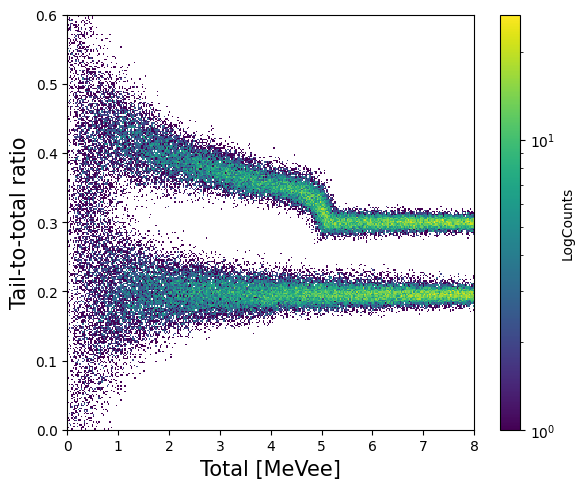

In [22]:
totals,ttr = gsd.get_psd_integrals(data_synth)
plt.figure(figsize=(6, 5))

# no cuts
plt.hist2d(
    totals,
    ttr,
    bins=[300, 300],
    range=[[0, 8], [0, 0.6]],
    norm=LogNorm(),
    cmap="viridis"
)

plt.colorbar(label="LogCounts")
plt.xlabel('Total [MeVee]', fontsize = 15)
plt.ylabel("Tail-to-total ratio", fontsize = 15)
plt.tight_layout()
plt.show()

# Debugging

In [24]:
templates_neutrons = templates_n_clean
templates_gammas = templates_g_clean
print('n', templates_neutrons.shape)
print('g', templates_gammas.shape)
bin_centers = bin_centers_n_clean

n (10, 296)
g (10, 296)
